# **4. 선형회귀와 지도학습**
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 파이썬 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML2nd
*  저작권 : 본 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### 4.12 다변량 선형 회귀 연습을 위한 데이터 다루기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns    # 시각화를 위하여 Seaborn 라이브러리를 이용함

data_loc = 'https://github.com/dknife/ML2nd/raw/main/data/'
eed_df = pd.read_csv(data_loc + 'energy_efficiency_data.csv')
eed_df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
eed_df.columns = [
    "Compactness", "Surface", "Wall", "Roof",
    "Height", "Orientation", "Glazing_Area",
    "Glazing_Area_Distribution", "Heating_Load", "Cooling_Load"
]
eed_df.head()

,Compactness,Surface,Wall,Roof,Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
eed_df = eed_df[["Heating_Load", "Cooling_Load",
           "Compactness", "Surface", "Wall", "Roof",
            "Height", "Orientation", "Glazing_Area",
            "Glazing_Area_Distribution"]]
eed_df.head()

,Heating_Load,Cooling_Load,Compactness,Surface,Wall,Roof,Height,Orientation,Glazing_Area,Glazing_Area_Distribution
0,15.55,21.33,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,15.55,21.33,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,15.55,21.33,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,15.55,21.33,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,20.84,28.28,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [ ]:
print(eed_df.shape)
print(eed_df.isnull().sum())

(768, 10)
Heating_Load                 0
Cooling_Load                 0
Compactness                  0
Surface                      0
Wall                         0
Roof                         0
Height                       0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
dtype: int64


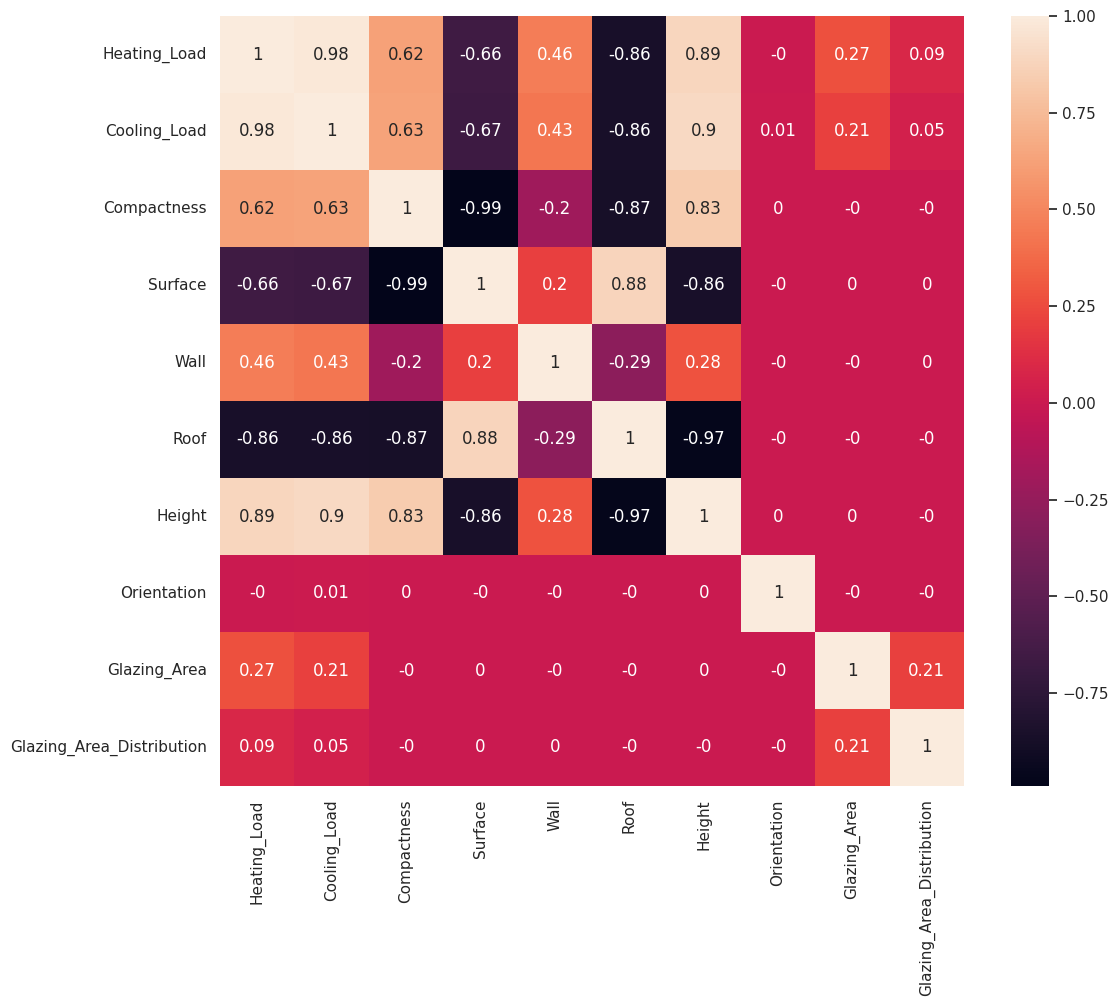

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})    # 상관행렬 가시
correlation_matrix = eed_df.corr().round(2) # 상관행렬 생성
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()  # colab 등 노트북 환경에서는 필요없지만, 콘솔 환경 등에서는 필요

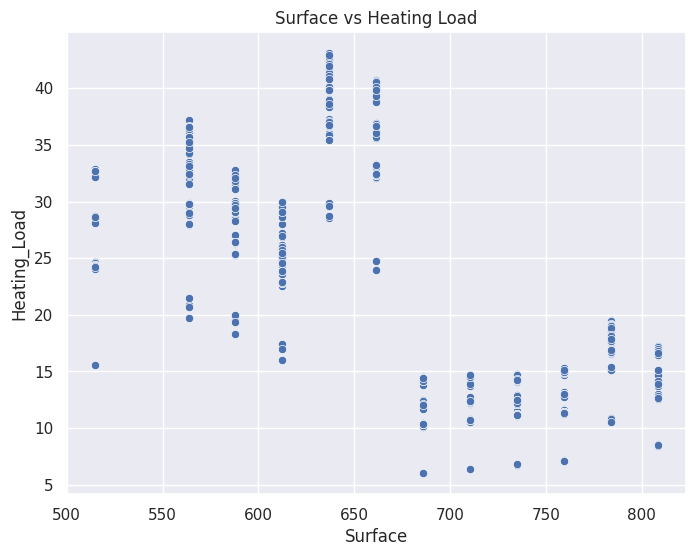

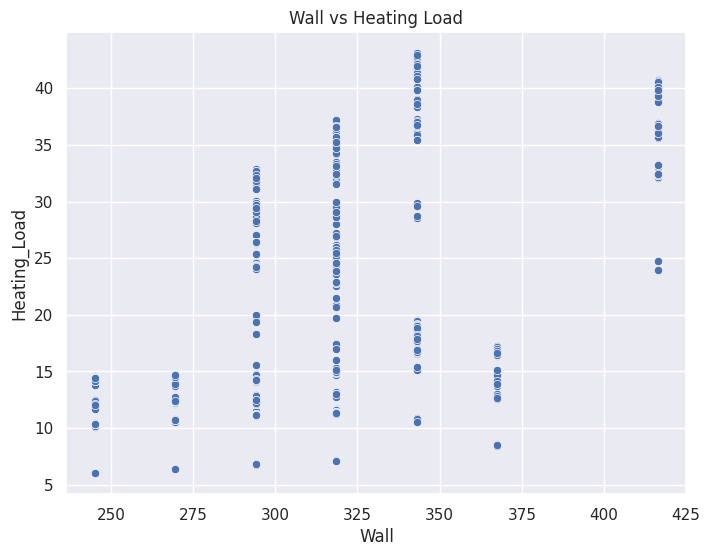

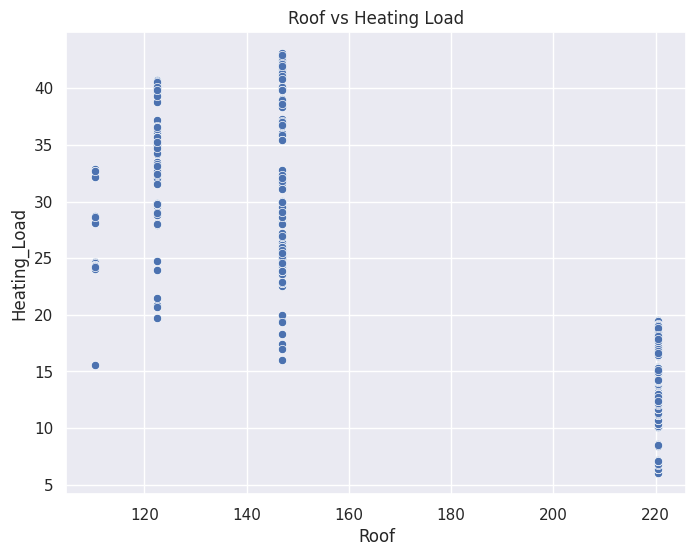

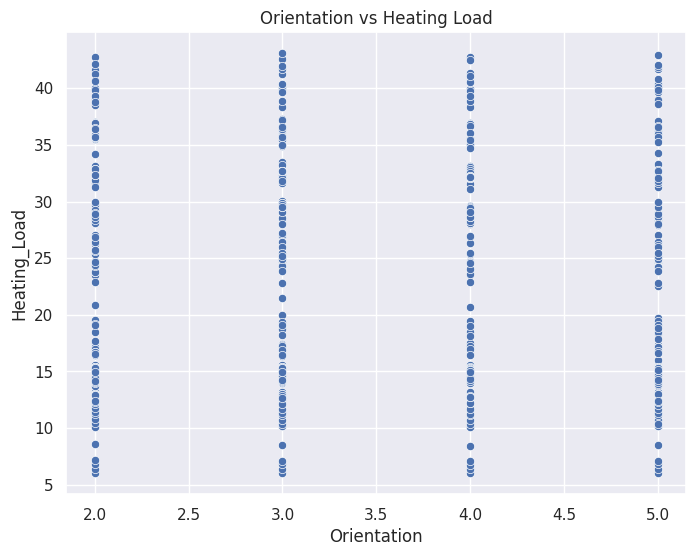

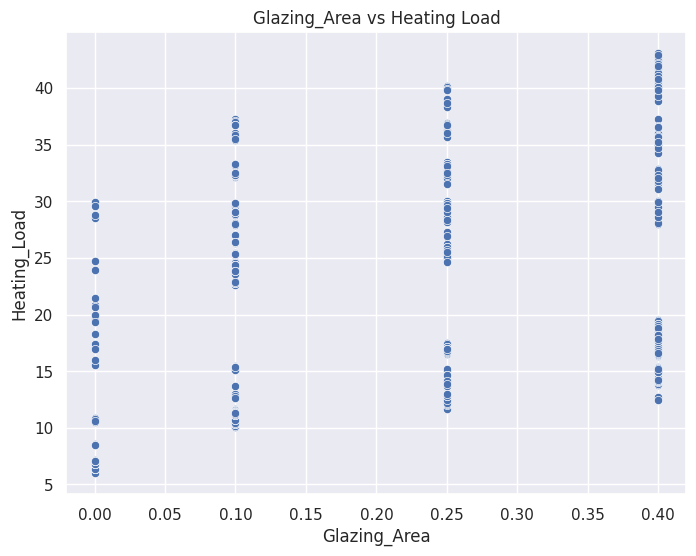

In [ ]:
# 주요 변수 시각화
features = ["Surface", "Wall", "Roof", "Orientation", "Glazing_Area"]

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=eed_df, x=feature, y="Heating_Load")
    plt.title(f"{feature} vs Heating Load")
    plt.show()



In [ ]:
X = eed_df[["Compactness", "Surface", "Wall", "Roof",
            "Height", "Orientation", "Glazing_Area",
            "Glazing_Area_Distribution"]]
y = eed_df['Heating_Load']
print(X)
print(y)

     Compactness  Surface   Wall    Roof  Height  Orientation  Glazing_Area  \
0           0.98    514.5  294.0  110.25     7.0            2           0.0   
1           0.98    514.5  294.0  110.25     7.0            3           0.0   
2           0.98    514.5  294.0  110.25     7.0            4           0.0   
3           0.98    514.5  294.0  110.25     7.0            5           0.0   
4           0.90    563.5  318.5  122.50     7.0            2           0.0   
..           ...      ...    ...     ...     ...          ...           ...   
763         0.64    784.0  343.0  220.50     3.5            5           0.4   
764         0.62    808.5  367.5  220.50     3.5            2           0.4   
765         0.62    808.5  367.5  220.50     3.5            3           0.4   
766         0.62    808.5  367.5  220.50     3.5            4           0.4   
767         0.62    808.5  367.5  220.50     3.5            5           0.4   

     Glazing_Area_Distribution  
0                 

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

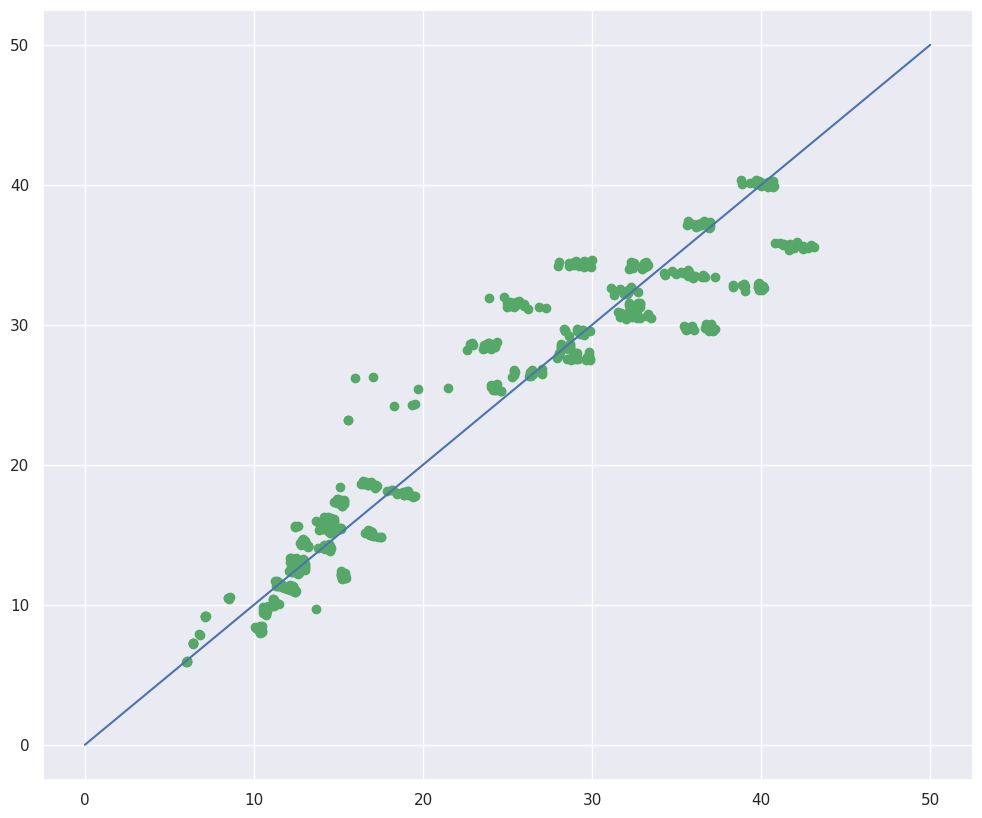

In [ ]:
y_hat_train = lin_model.predict(X_train)
plt.scatter(y_train, y_hat_train, c='g')
xy_range = [0, 50]
plt.plot(xy_range, xy_range)

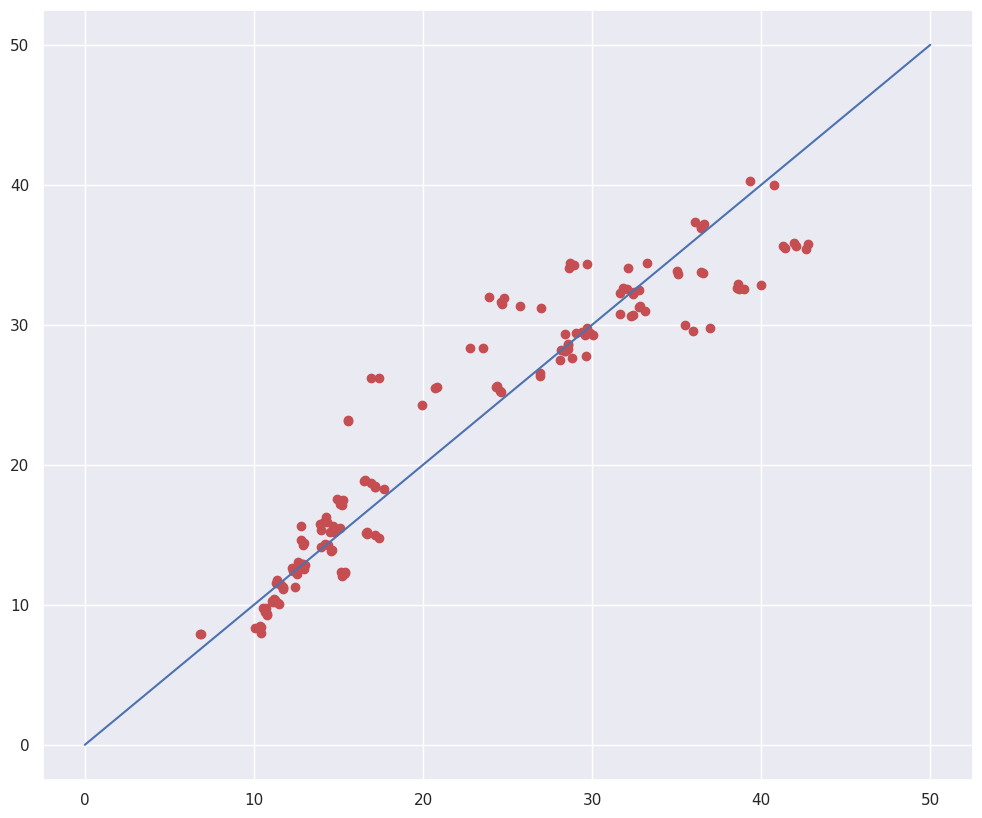

In [ ]:
y_hat_test = lin_model.predict(X_test)

plt.scatter(y_test, y_hat_test, c='r')  # 검증 데이터와 예측 데이터의 산포도
xy_range = [0, 50]
plt.plot(xy_range, xy_range)

In [ ]:
from sklearn.metrics import mean_squared_error
print('Mean squared error:', mean_squared_error(y_test, y_hat_test))

Mean squared error: 10.218725937438716


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()                    # 기본이 0~1
n_X = scaler.fit_transform(X)              # X는 DataFrame 또는 numpy array
n_X = pd.DataFrame(n_X, columns = X.columns)
n_X.head()

,Compactness,Surface,Wall,Roof,Height,Orientation,Glazing_Area,Glazing_Area_Distribution
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0


In [ ]:
nXtrain,nXtest,y_train,y_test = train_test_split(n_X, y, test_size=0.2)
lin_model.fit(nXtrain, y_train)

LinearRegression()

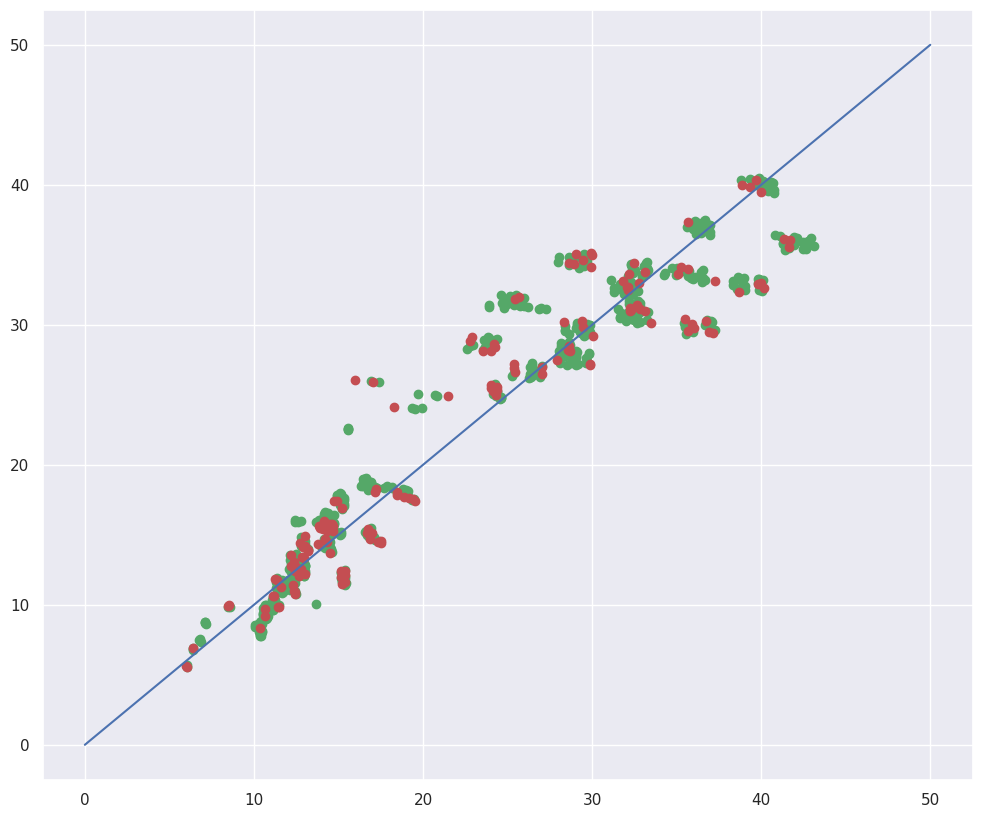

In [ ]:
y_hat_train = lin_model.predict(nXtrain)
y_hat_test = lin_model.predict(nXtest)
plt.scatter(y_train, y_hat_train, color='g')
plt.scatter(y_test, y_hat_test, color='r')
plt.plot(xy_range, xy_range)

In [ ]:
from sklearn.metrics import mean_squared_error
print('Mean squared error:', mean_squared_error(y_test, y_hat_test))

Mean squared error: 9.978074037483623


(array([[256., 192., 128., 128.,  64.],
        [128., 128., 192., 128., 192.],
        [128., 192., 320.,  64.,  64.],
        [192., 192.,   0.,   0., 384.],
        [384.,   0.,   0.,   0., 384.],
        [192., 192.,   0., 192., 192.],
        [ 48., 240.,   0., 240., 240.],
        [ 48., 144., 144., 144., 288.]]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 8 BarContainer objects>)

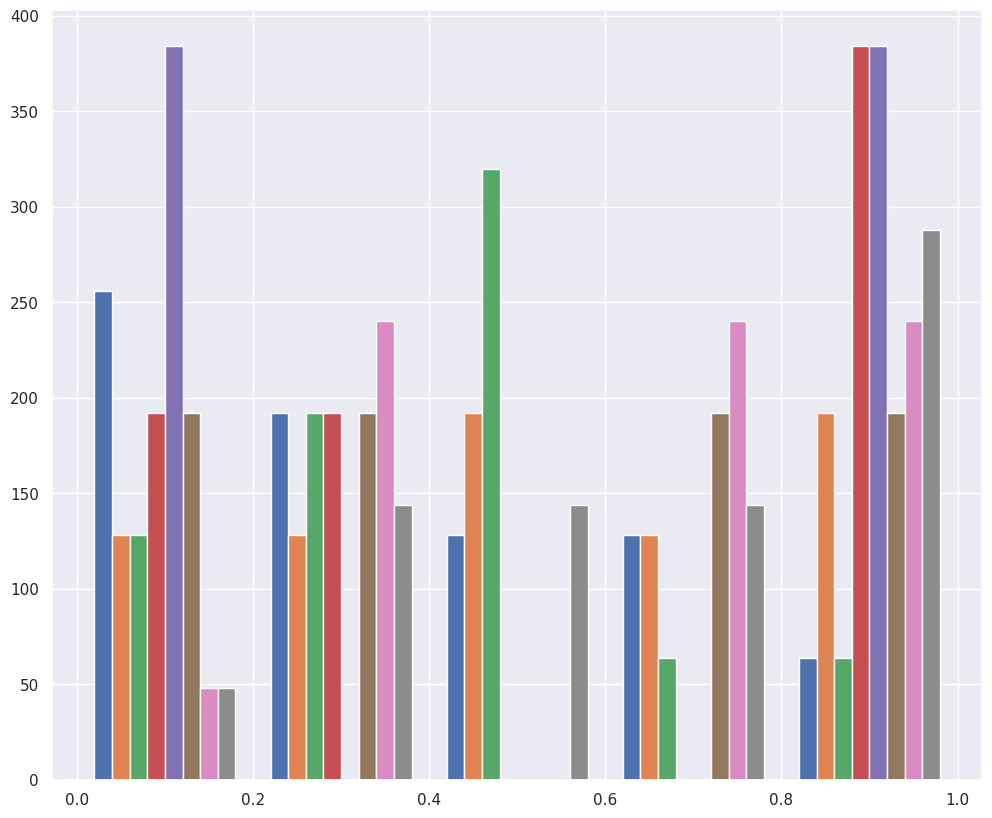

In [ ]:
plt.hist(n_X, bins=5)

(array([[128., 256., 192., 128.,  64.],
        [128., 192., 192., 192.,  64.],
        [128., 192., 320.,  64.,  64.],
        [192., 192.,   0., 384.,   0.],
        [  0., 384.,   0., 384.,   0.],
        [192., 192., 192., 192.,   0.],
        [288.,   0., 240., 240.,   0.],
        [192., 144., 144., 288.,   0.]]),
 array([-1.81457514, -1.00209892, -0.1896227 ,  0.62285351,  1.43532973,
         2.24780595]),
 <a list of 8 BarContainer objects>)

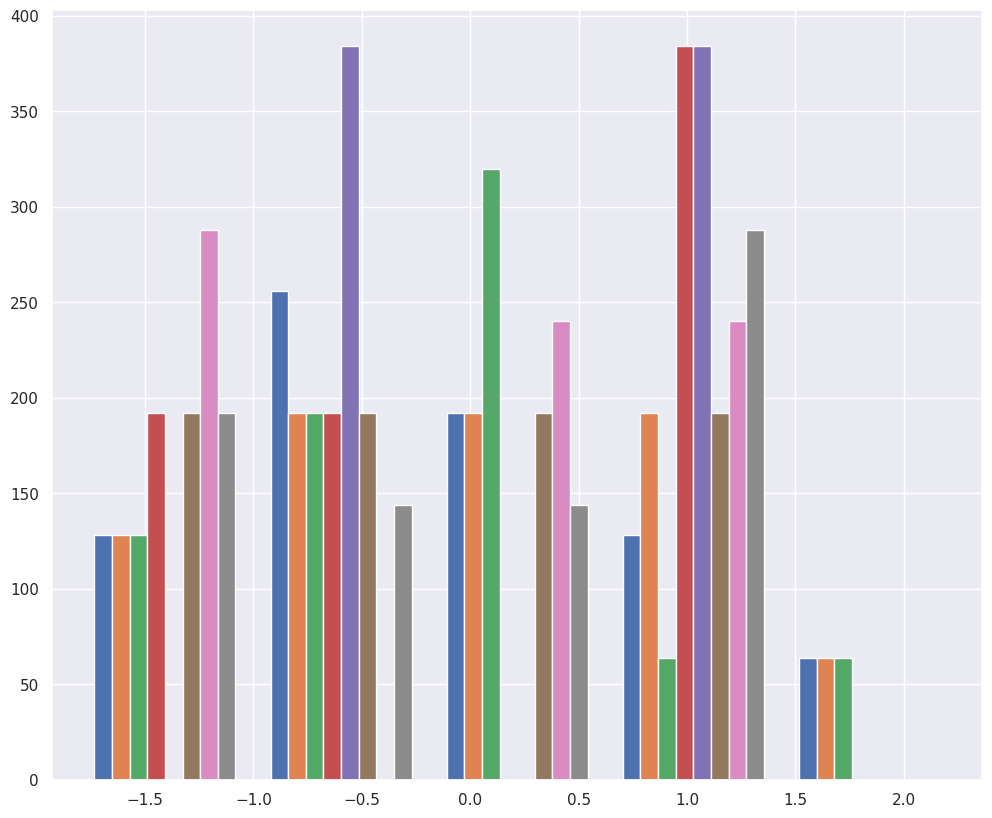

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()        # 표준화 스케일러 생성
s_X = scaler.fit_transform(X)    # 표준화 스케일러 적용
s_X = pd.DataFrame(s_X, columns = X.columns)
n_X.head()

plt.hist(s_X, bins=5)            # 표준화 결과의 가시화

In [ ]:
sXtrain,sXtest,y_train,y_test = train_test_split(s_X, y, test_size=0.2)
lin_model.fit(sXtrain, y_train)

LinearRegression()

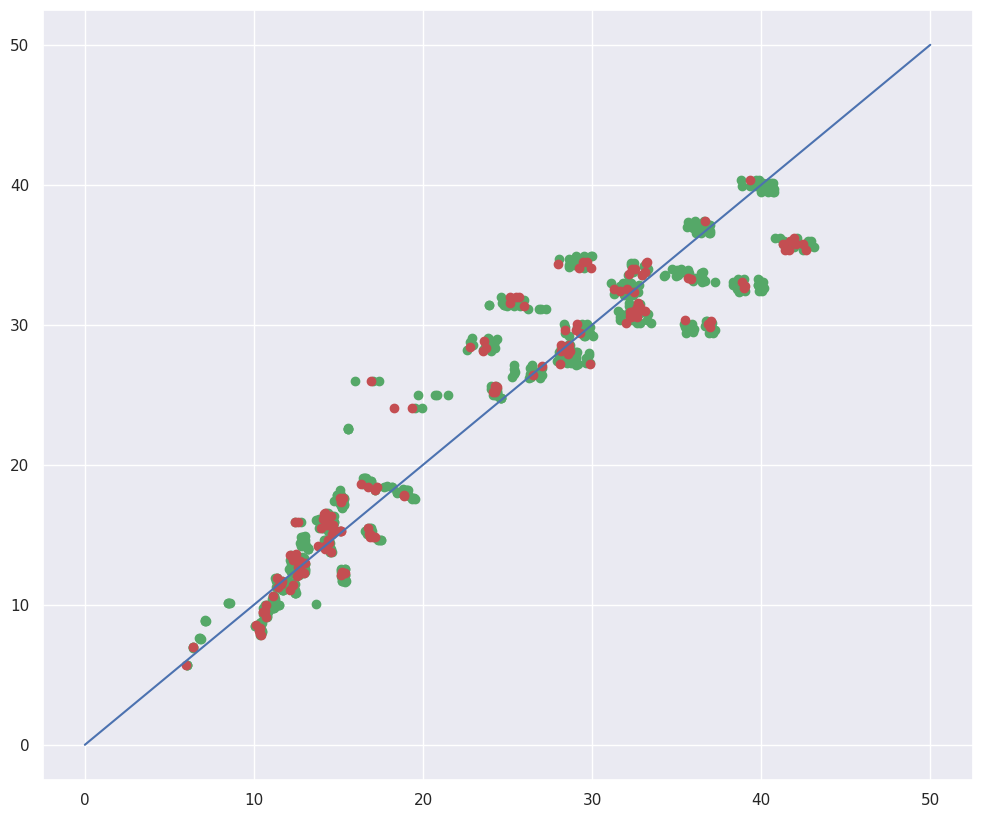

In [ ]:
y_hat_train = lin_model.predict(sXtrain)
y_hat_test = lin_model.predict(sXtest)
plt.scatter(y_train, y_hat_train, color='g')
plt.scatter(y_test, y_hat_test, color='r')
plt.plot(xy_range, xy_range)

In [ ]:
print('Mean squared error:', mean_squared_error(y_test, y_hat_test))

Mean squared error: 9.17044009814755
